<a href="https://colab.research.google.com/github/csbuan/-Titanic-Survival-Prediction/blob/main/Titanic_Dataset_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster


Titanic Dataset
1. What model did you use and why?
2. Share some basic EDA and data visualizations on the dataset.
3. What questions do you have about the dataset? Is there anything you would want to explore further? What questions would you ask your "domain expert"?
4. What do your predictions look like? Does it make sense?
5. How did your model perform? (from what we've seen so far in the class)

Logistic regression is a type of regression analysis used for predicting a binary outcome (0 or 1, in this case, whether a passenger survived or not in the context of the Titanic Dataset)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [2]:
# importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/csbuan/-Titanic-Survival-Prediction/main/titanic_train_demo.csv')
titanic = df.copy()
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# how may rows and columns
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# numerical variables' summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_num = titanic[['Age', 'SibSp', 'Parch', 'Fare']]
titanic_cat = titanic[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [8]:
titanic['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [9]:
titanic['Parch'].value_counts()         # Include in features as well

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


# Exploratory Data Analysis
## Missing data

In [10]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

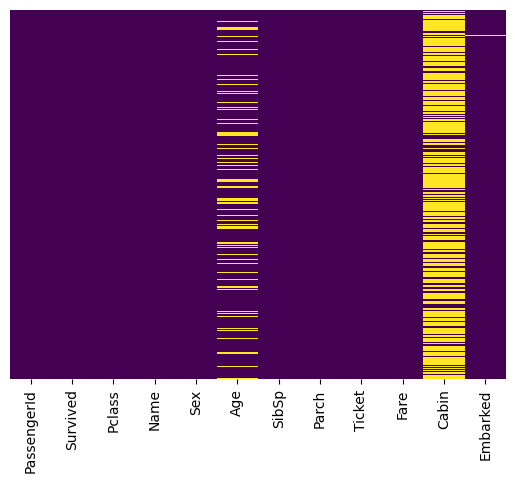

In [11]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<font color=c1121f> Roughly 20 percent of the Age data is missing.

## Detecting Outliers

<Axes: >

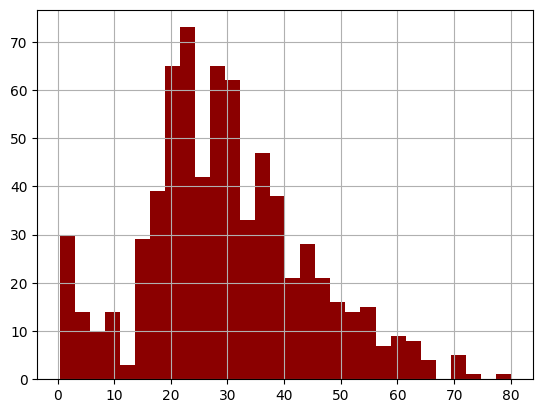

In [12]:
titanic['Age'].hist(bins=30, color='darkred')

<Axes: >

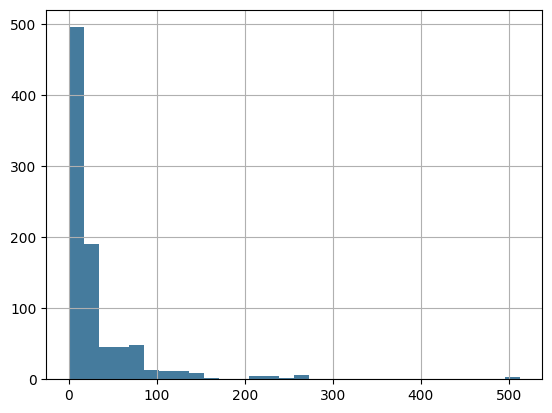

In [13]:
titanic['Fare'].hist(bins=30, color='#457b9d')

<ipython-input-14-ac91e0130554>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',


<Axes: xlabel='Pclass', ylabel='count'>

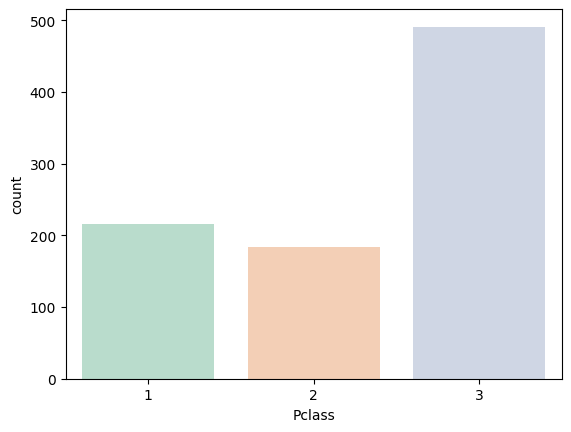

In [14]:
sns.countplot(x='Pclass',
              data=titanic,
              palette='Pastel2')

<ipython-input-15-b8db26792051>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',


<Axes: xlabel='Survived', ylabel='count'>

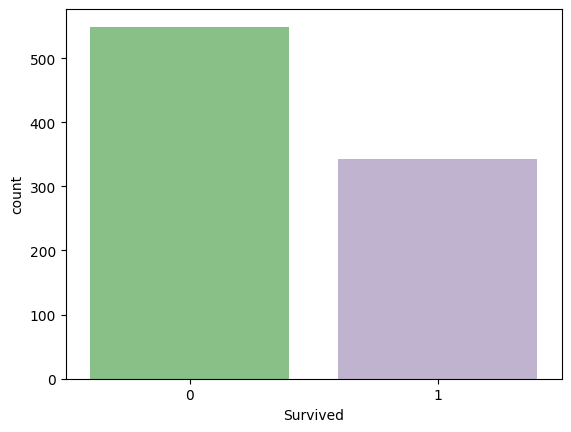

In [15]:
sns.countplot(x='Survived',
              data=titanic,
              palette='Accent')

<Axes: xlabel='Survived', ylabel='count'>

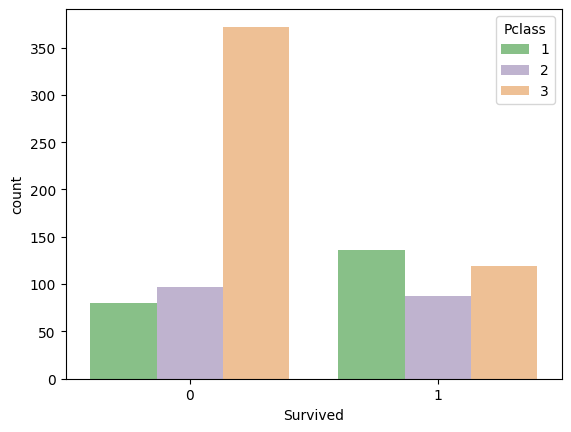

In [16]:
sns.countplot(x='Survived',               # 0 = No, 1 = Yes
              data=titanic,
              hue='Pclass',
              palette='Accent')

In [17]:
titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<font color=c1121f>It clearly shows here 233 females survived out of 314 and out of 577 males, only 109 survived. The survival ratio of female is greater than that of male.

# Data Cleaning

<ipython-input-18-d53b0182275d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',


<Axes: xlabel='Pclass', ylabel='Age'>

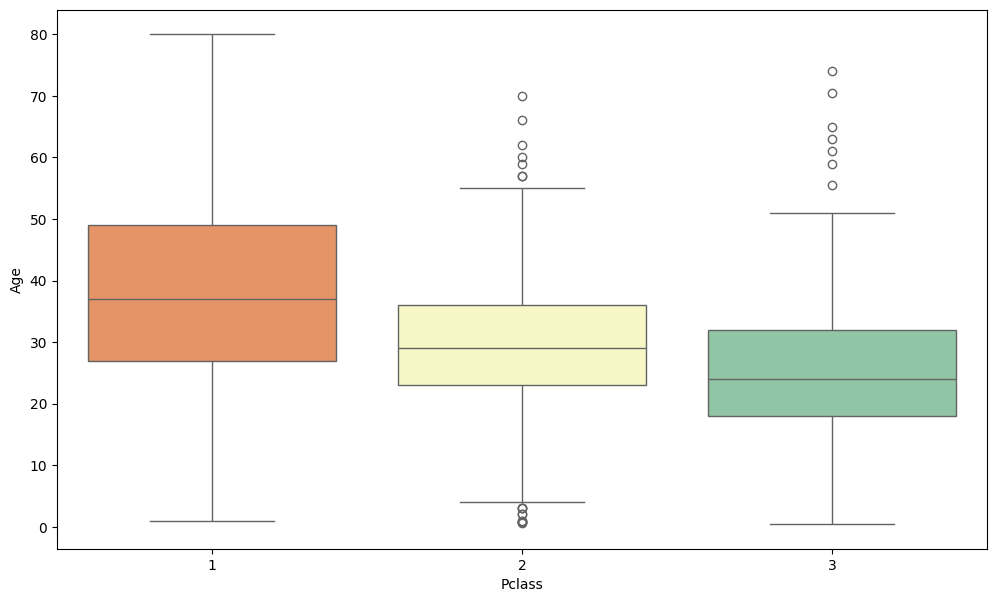

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',
            y='Age',
            data = titanic,
            palette='Spectral')

<font color=c1121f>Wealthier passengers in the higher classes tend to be older.
We will use these average age values to impute for Age based on Pclass.

In [19]:
# imputation for age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols [1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:     # note that you cannot have two elifs or else this function will not work
            return 29
        else:
            return 24
    else: return Age

In [20]:
# check the Age and Pclass first
titanic[['Age', 'Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [21]:
# apply the imputation for age
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

<ipython-input-19-51166d1eb7e4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-19-51166d1eb7e4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols [1]


In [22]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
titanic.shape

(891, 12)

In [24]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

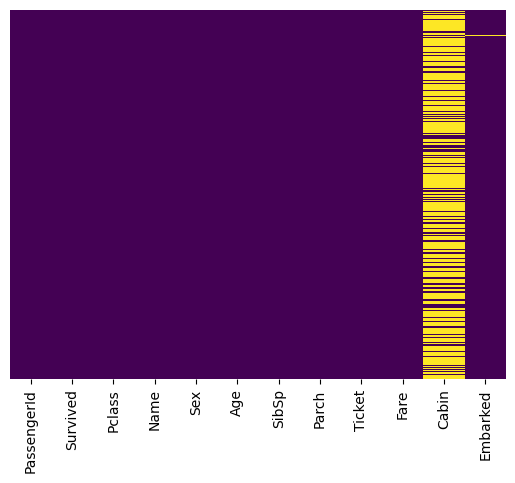

In [25]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<font color=c1121f>'Age' is filled in and there are no null values anymore.

In [26]:
# drop the rows with NaN [!!! DO NOT DROP !!!]
# titanic.dropna(inplace=True)

In [27]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
titanic.shape

(891, 12)

# Convert Data Types

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# convert 'Age' from float to int
titanic['Age'] = titanic['Age'].astype(int)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [31]:
# convert the 'Sex' column to binary format (0, 1)
# for logistic regressio purpose
titanic['Sex'] = titanic['Sex'].map({'female': 0, 'male': 1})     # only run once or else you will get NaN in 'Age'
titanic['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64>

In [32]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,C


In [34]:
len(titanic[titanic['Age'] == 0])

7

In [35]:
# check duplicates
titanic[titanic.duplicated()].shape[0]

0

# Additional Data Cleaning
## Dropping of NaN
Drop columns 'Cabin' and 'Ticket' and all rows with NaN in 'Embarked'

In [36]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

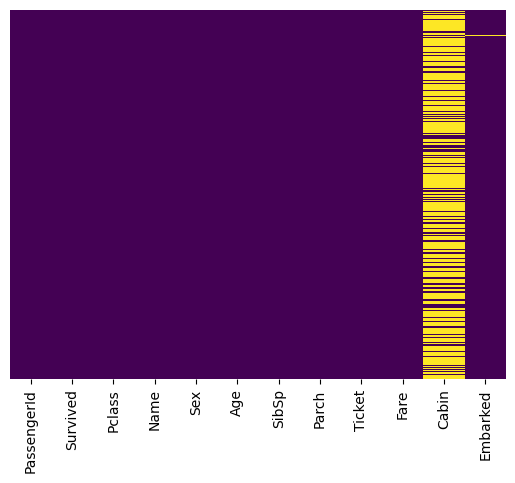

In [37]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [38]:
titanic.drop('Cabin', axis=1, inplace=True)

In [39]:
titanic.drop('Ticket', axis=1, inplace=True)

In [40]:
titanic.shape

(891, 10)

In [41]:
titanic.dropna(inplace=True)
titanic.shape

(889, 10)

In [42]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [43]:
titanic.groupby('Embarked')['PassengerId'].count()

,PassengerId
Embarked,
C,168
Q,77
S,644


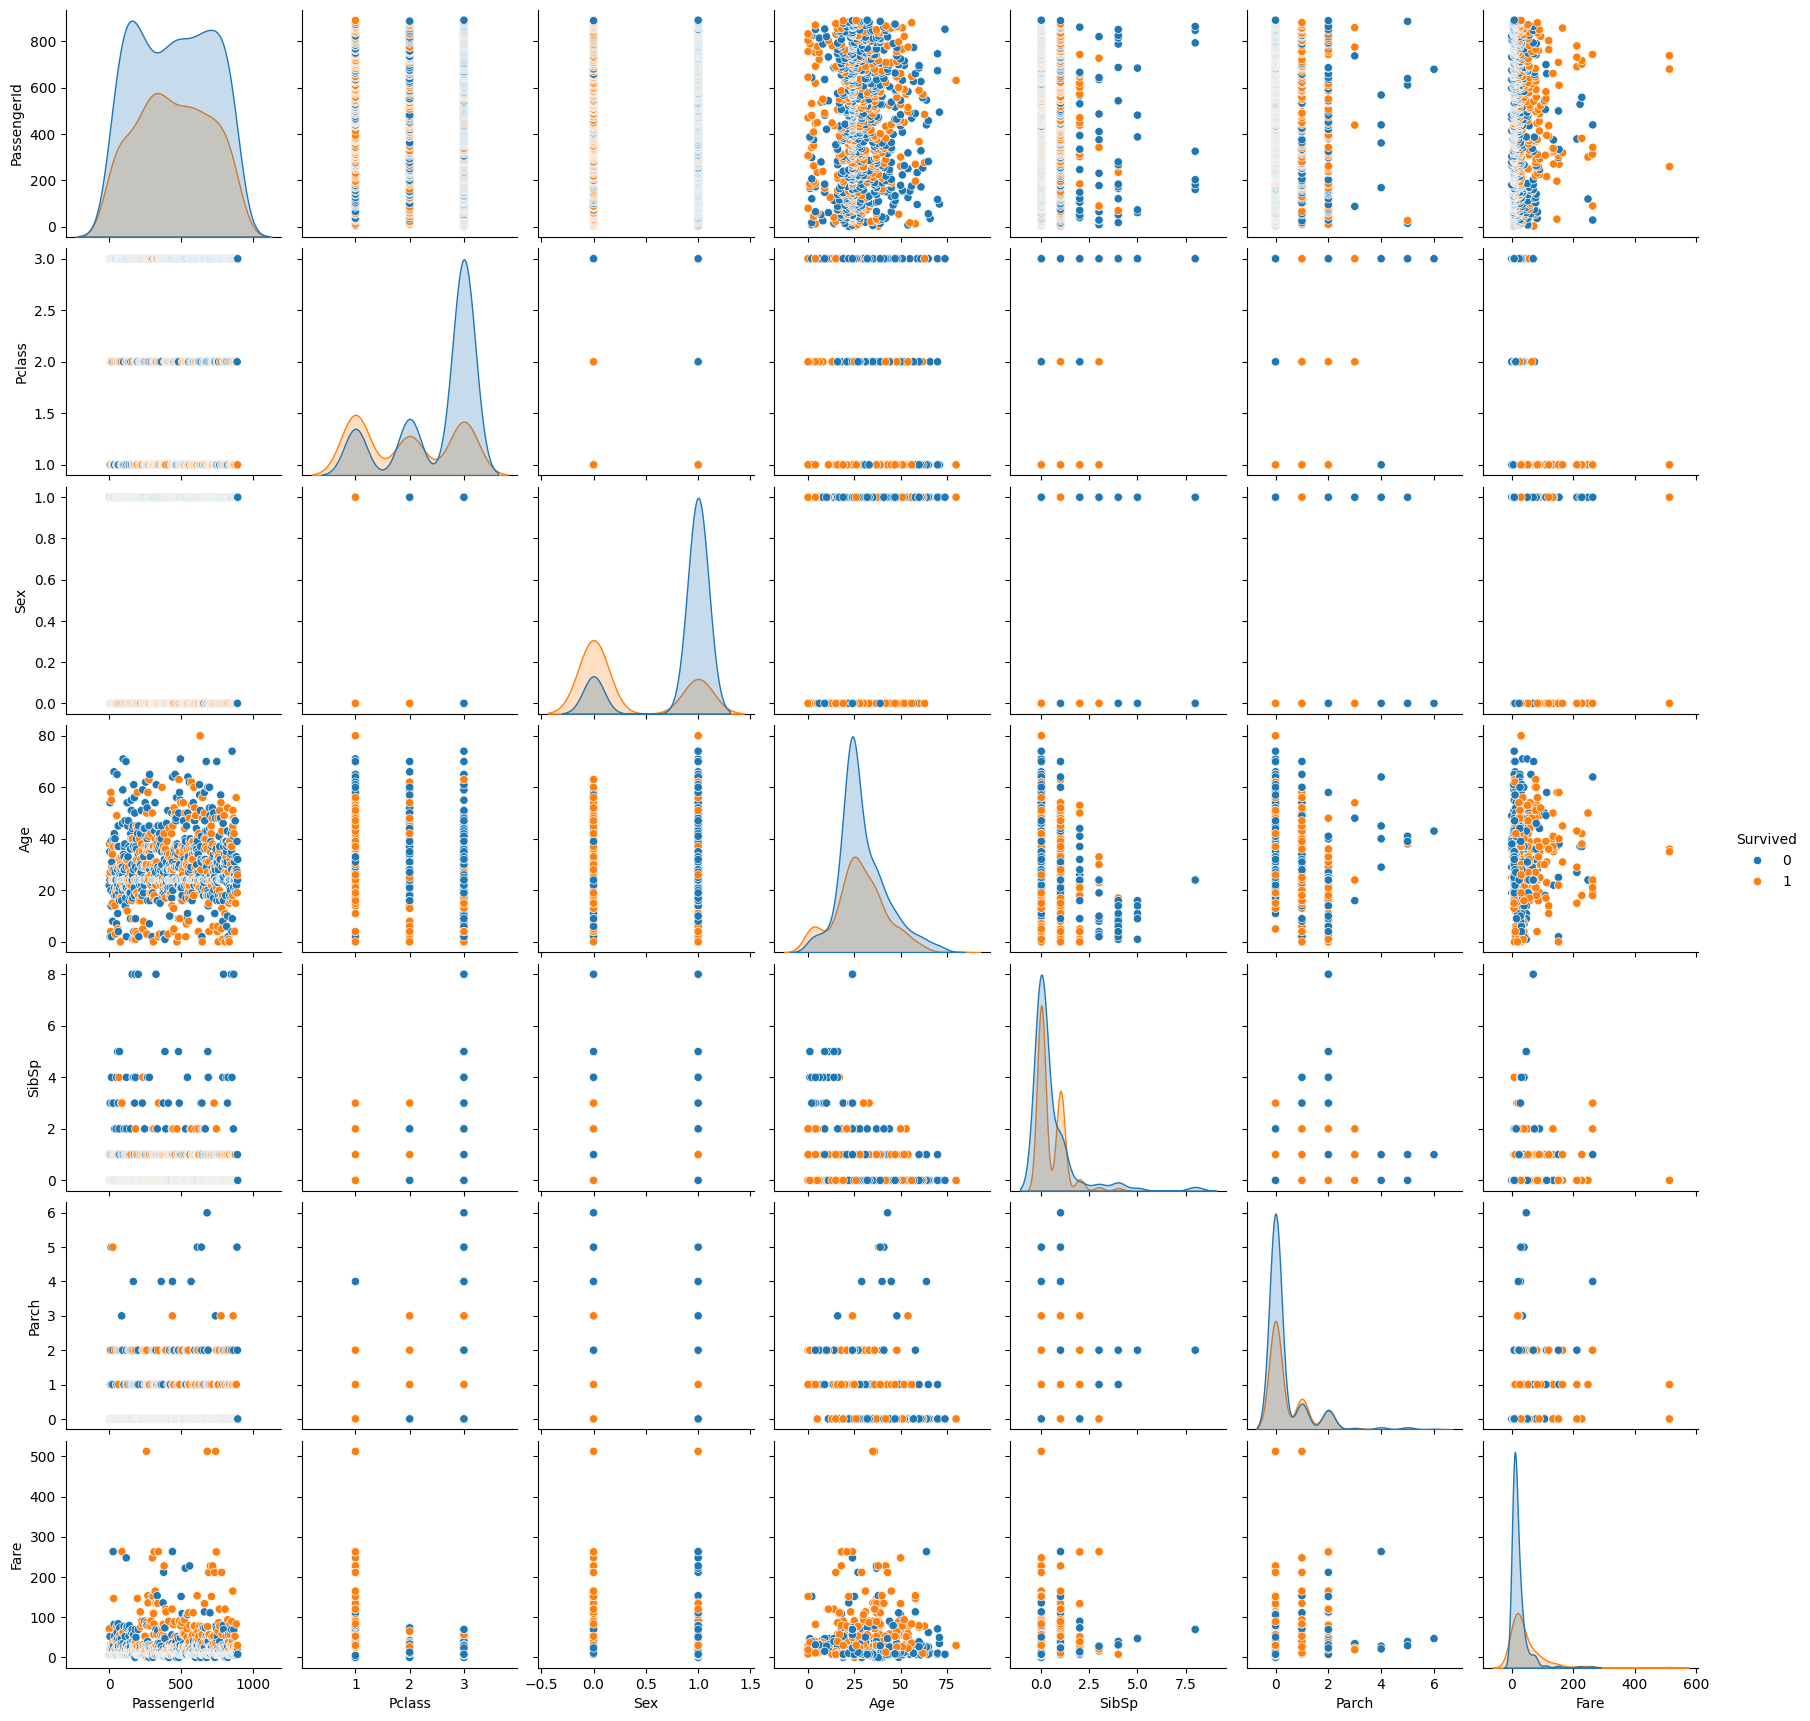

In [67]:
sns.pairplot(titanic,hue='Survived')

### * * *End of Exploratory Data Analysis* * *

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 76.4+ KB


In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S


In [70]:
titanic.shape

(889, 10)

## Machine Learning Model

# Logistic Regression

## Import Libraries

<font color=c1121f>The goal of this model is to predict whether a passenger on the Titanic survived the sinking of the ship. We are interested in understanding the factors that may have influenced the likelihood of survival. The model uses several passenger attributes, such as age, class, gender, fare, the number of siblings/spouses aboard, and the number of parents/children aboard, to make predictions. By analyzing these features, the model aims to determine the probability of a passenger surviving the Titanic disaster. This prediction can be valuable for understanding the impact of various factors on survival rates and for making informed decisions or drawing insights related to historical events.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [72]:
features = ['Age', 'Pclass', 'Sex', 'Fare', 'SibSp', 'Parch']
X = titanic[features]
y = titanic['Survived']

In [73]:
titanic[features]

,Age,Pclass,Sex,Fare,SibSp,Parch
0,22,3,1,7.2500,1,0
1,38,1,0,71.2833,1,0
2,26,3,0,7.9250,0,0
3,35,1,0,53.1000,1,0
4,35,3,1,8.0500,0,0
...,...,...,...,...,...,...
886,27,2,1,13.0000,0,0
887,19,1,0,30.0000,0,0
888,24,3,0,23.4500,1,2
889,26,1,1,30.0000,0,0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 76.4+ KB


In [76]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

# Predictions


Now, we will predict values for testing data.

In [77]:
titanic.shape

(889, 10)

In [78]:
y_pred = logreg_model.predict(X_test)

In [79]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

<font color='457b9d'>Calculate and evaluate the accuracy of the model or its performance by comparing the comparing the predictions (y_pred) to actual outcomes in the testing set (y_test) to assess how well the model generalizes to new, unseen data.

# Evaluations

<font color='457b9d'>1. Using Feature Importance (coefficients)

<font color='457b9d'>In logistic regression, the model estimates the probability of a binary outcome based on a set of predictor variables. The coefficients I have obtained represent the impact of each feature on the predicted probability of a passenger surviving.

In [80]:
logreg_model.coef_

array([[-0.04983057, -1.13229045, -2.6102674 ,  0.00317067, -0.43688086,
        -0.04555768]])

<font color='457b9d'>features = ['Age', 'Pclass', 'Sex', 'Fare', 'SibSp', 'Parch']
<br> X = titanic[features]
<br>y = titanic['Survived']

<font color='457b9d'>**Age:** -0.04983057
<br> This coefficient is negative, which means that as the age of the passenger increases, the probability of surviving decreases. In other words, older passenger are less likely to survive.
<br> **Pclass:**-1.13229045
<br> This coefficient is also negative, indicating that as the passenger class (Pclass) value increases (i.e. moving from 1st class to 2nd class or from 2nd class to 3rd class), the probability of surviving decreases. Passengers in higher classes are more likely to survive.
<br> **Sex:** -2.6102674
<br> This coefficient is negative and significant. It indicates that being male (codes as 1) has a significant negative impact on the probability of surviving, while being a female (coded as 0) has a significant positive impact on the probability of surviving. In other words, females are much more likely to survive than males.
<br> **Fare:** 0.00317067
<br> This coefficient is positive, which means that as the fare paid by the passenger increases, the probability of surviving also increases. Passengers who paid more have a slightly higher chance of survival.
<br> **SibSp** (Number of Siblings/Spouses Aboard): -0.43688086
<br> The coefficient is negative, indicating that having more parents or children on board reduces the probability of surviving. Passengers with more family members on board are less likely to survive.

<font color='457b9d'>These coefficients reflect the impact of each feature on the probability of survival in the logistic regression model.


<font color='457b9d'>*To make predictions, you can use these coefficients to calculate the log-odds and then convert them into probabilities using the logistic function (sigmoid function), which will give you the probability of a passenger surviving or not.*

<font color='457b9d'>2. Confusion Matrix

<font color='457b9d'>What is a Confusion Matrix?  
A confusion matrix is a summary of prediction results on a classification problem.  

<font color='457b9d'>The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.  

<font color='457b9d'>The confusion matrix shows the ways in which your classification model is confused when it makes predictions.  

<font color='457b9d'>It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.  

<font color='457b9d'>It is this breakdown that overcomes the limitation of using classification accuracy alone.  

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix - evaluation
cf = confusion_matrix(y_test, y_pred)
cf

array([[143,  24],
       [ 27,  73]])

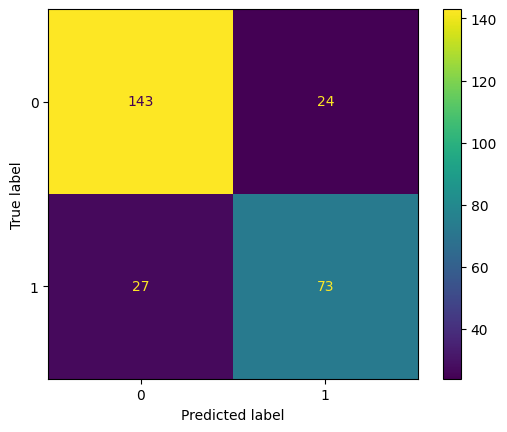

In [82]:
cm = confusion_matrix(y_test, y_pred, labels=logreg_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [83]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8089887640449438

### Precision
How many from the predicted results are relevant?

$\begin{equation}
precision =  \frac{True Positive}{True Positive + False Positive}
\end{equation}$



In [84]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred) # always ganito. iccheck if tama ba yung y_test

0.7525773195876289

### Recall
How many relevant items were selected?

$\begin{equation}
recall =  \frac{True Positive}{True Positive + False Negative}
\end{equation}$



In [85]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.73

# Classification report

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.75      0.73      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [88]:
from sklearn.metrics import log_loss
log_loss(y_test, logreg_model.predict_proba(X_test))
# sklearn.metrics.log_loss(y_true, y_pred, *, eps='auto', normalize=True, sample_weight=None, labels=None)[source]

0.4439017206651326